# Naive example of Grover's Algorithm (created with prior knowledge of their solutions)

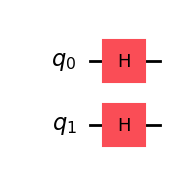

In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector


# Step 1: Create the Grover circuit for 2 qubits
qc = QuantumCircuit(2)

# Step 2: Put both qubits into superposition
qc.h([0, 1])
qc.draw('mpl')


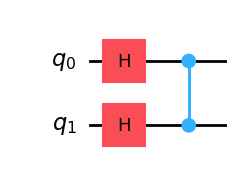

In [13]:
# Step 3: Oracle for |11⟩ → flips sign of |11⟩ only
qc.cz(0, 1)
qc.draw('mpl')

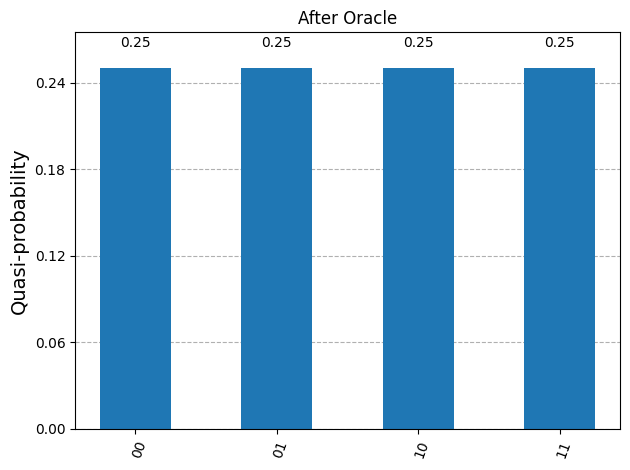

In [14]:
state_oracle = Statevector.from_instruction(qc)
plot_histogram(state_oracle.probabilities_dict(), title="After Oracle")


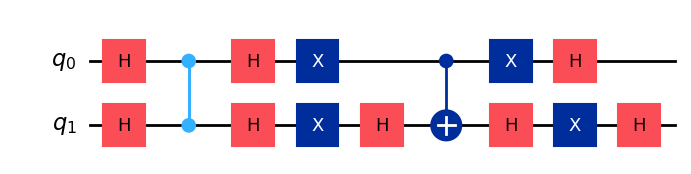

In [15]:
# Step 4: Diffusion operator (inversion about the mean)
qc.h([0, 1])
qc.x([0, 1])
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.x([0, 1])
qc.h([0, 1])
qc.draw('mpl')

In [16]:
# Step 5: Measure all qubits
qc.measure_all()

# Step 6: Simulate the circuit
backend = Aer.get_backend('aer_simulator')  # latest backend
job = backend.run(qc, shots=2000)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 2000}


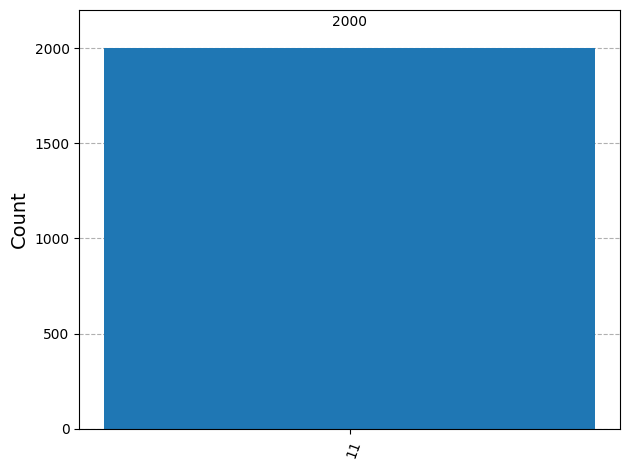

In [17]:
# Step 7: Plot results
plot_histogram(counts)